In [129]:
import pandas as pd
import numpy as np
import plotly.express as px
import vnstock
from vnstock import Vnstock
import datetime as dt
import time 
import matplotlib.pyplot as plt

In [130]:
ticker = ['ACB','BCM','BID','CTG','DGC','FPT','GAS','GVR','HDB','HPG','LPB','MBB','MSN','MWG','PLX','SAB','SHB','SSB','SSI','STB','TCB','TPB','VCB','VHM','VIB','VIC','VJC','VNM','VPB','VRE']

#Big folder to put all the CSV in. Then at the end, pd.concat to stack them together in 1 DataFrame
all_quotes = []

#Divide each in separate. If want to call separately, use code: per_ticker['FPT'].head() or per_ticker['HDB'].tail()
per_ticker = {}

s = Vnstock().stock (symbol = 'ACB', source = 'VCI')
df = s.quote.history (start = str(dt.date.today() - dt.timedelta(365*6) ), end = str(dt.date.today()), interval = '1W')
df['time'] = pd.to_datetime(df['time'])
df.dropna(inplace=True)
Time = df.time.to_list()
DF_Summary = pd.DataFrame(data=Time,columns=['time'])
DF_Summary

,time
0,2019-09-01
1,2019-09-08
2,2019-09-15
3,2019-09-22
4,2019-09-29
...,...
307,2025-08-03
308,2025-08-10
309,2025-08-17
310,2025-08-24


In [131]:
# windows week
for t in ticker: 
    print(t)
    df = s.quote.history (symbol = t,start = str(dt.date.today() - dt.timedelta(365*6) ), end = str(dt.date.today()), interval = '1W')
    df['time'] = pd.to_datetime(df['time'])
    df = df.drop(columns = ['open', 'high', 'low', 'volume'])
    df.sort_values(by ='time',ascending=False,inplace=True)
    df['log_return'] = np.log(df['close'] / df['close'].shift(-1))*100
    df[f'{t}'] = df['log_return'].apply(lambda x: +1 if x > 0 else -1)
    time.sleep(1.5)
    DF_Summary = DF_Summary.merge(df[[f'{t}','time']],on = 'time',how='left')
DF_Summary

ACB
BCM
BID
CTG
DGC
FPT
GAS
GVR
HDB
HPG
LPB
MBB
MSN
MWG
PLX
SAB
SHB
SSB
SSI
STB
TCB
TPB
VCB
VHM
VIB
VIC
VJC
VNM
VPB
VRE


,time,ACB,BCM,BID,CTG,DGC,FPT,GAS,GVR,HDB,...,TCB,TPB,VCB,VHM,VIB,VIC,VJC,VNM,VPB,VRE
0,2019-09-01,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,2019-09-08,-1,-1,-1,-1,-1,-1,1,-1,-1,...,1,-1,-1,1,1,-1,-1,-1,1,-1
2,2019-09-15,1,-1,1,1,-1,1,1,-1,1,...,1,1,1,-1,-1,1,1,-1,1,-1
3,2019-09-22,1,1,1,1,1,1,1,-1,1,...,1,-1,-1,1,-1,-1,-1,1,1,-1
4,2019-09-29,-1,-1,1,1,-1,1,1,-1,1,...,1,1,1,-1,1,1,-1,1,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,2025-08-03,-1,1,-1,-1,-1,-1,-1,-1,-1,...,-1,1,-1,-1,1,-1,-1,-1,1,-1
308,2025-08-10,1,1,1,1,1,-1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
309,2025-08-17,1,-1,1,1,-1,-1,-1,1,1,...,-1,1,1,-1,1,1,1,1,1,1
310,2025-08-24,1,-1,1,1,-1,-1,-1,-1,1,...,1,1,1,1,1,1,-1,-1,1,-1


In [140]:
DF_Summary.set_index('time',inplace=True)
DF_Summary.fillna(0,inplace=True)
DF_Summary

KeyError: "None of ['time'] are in the columns"

In [133]:
df = s.quote.history (symbol = 'VNINDEX',start = str(dt.date.today() - dt.timedelta(365*10) ), end = str(dt.date.today()), interval = '1W')

In [134]:
DF_working = DF_Summary

In [135]:
DF_working['A_D'] = DF_working.sum(axis=1) 
DF_working['Progress_A_D'] = DF_working['A_D'].cumsum()
DF_working

,ACB,BCM,BID,CTG,DGC,FPT,GAS,GVR,HDB,HPG,...,VCB,VHM,VIB,VIC,VJC,VNM,VPB,VRE,A_D,Progress_A_D
time,,,,,,,,,,,,,,,,,,,,,
2019-09-01,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-29.0,-29.0
2019-09-08,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,...,-1,1,1,-1,-1,-1,1,-1,-17.0,-46.0
2019-09-15,1,-1,1,1,-1,1,1,-1,1,1,...,1,-1,-1,1,1,-1,1,-1,13.0,-33.0
2019-09-22,1,1,1,1,1,1,1,-1,1,1,...,-1,1,-1,-1,-1,1,1,-1,11.0,-22.0
2019-09-29,-1,-1,1,1,-1,1,1,-1,1,-1,...,1,-1,1,1,-1,1,1,-1,5.0,-17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-08-03,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,-1,-1,1,-1,-18.0,158.0
2025-08-10,1,1,1,1,1,-1,1,1,1,1,...,1,1,1,1,1,1,1,1,26.0,184.0
2025-08-17,1,-1,1,1,-1,-1,-1,1,1,-1,...,1,-1,1,1,1,1,1,1,10.0,194.0


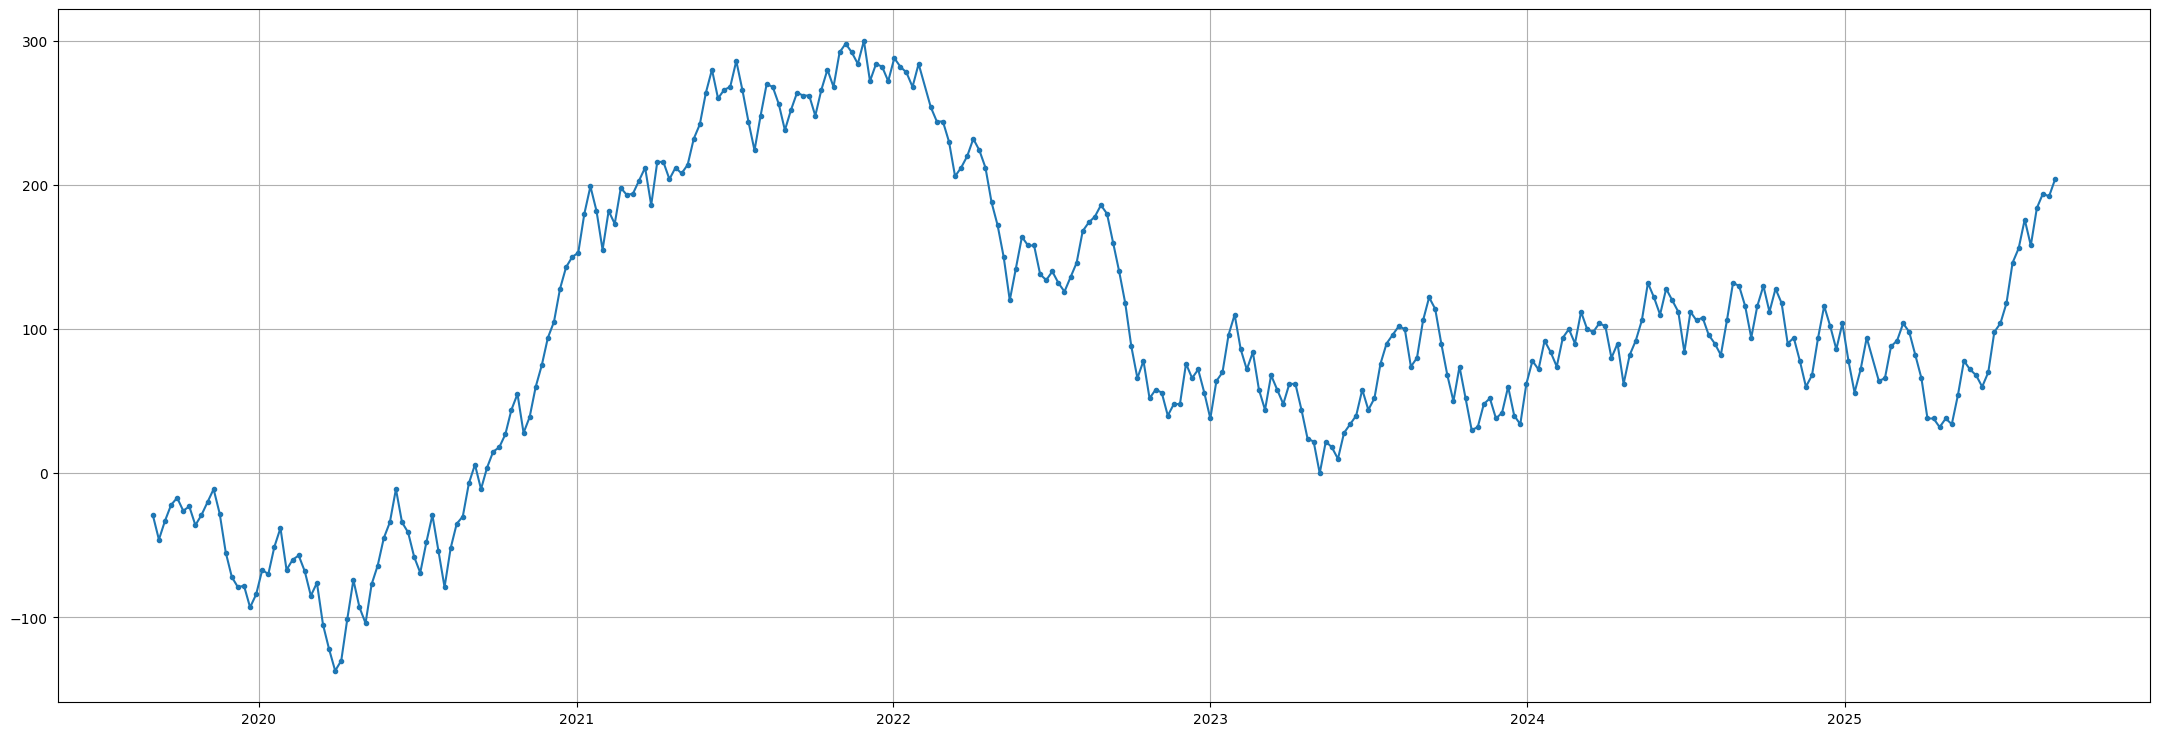

In [ ]:
plt.figure(figsize=(27,9))
plt.plot(DF_working['Progress_A_D'],marker = '.')
plt.grid()
plt.show()

In [137]:
DF__ = pd.DataFrame(data = Time,columns=['Time'])
DF__

,Time
0,2019-09-01
1,2019-09-08
2,2019-09-15
3,2019-09-22
4,2019-09-29
...,...
307,2025-08-03
308,2025-08-10
309,2025-08-17
310,2025-08-24


In [1]:
# AD line 
for date in Time:
    # Count AD
    for t in ticker:
        DF_dict['t'][]
    

SyntaxError: invalid syntax (3869107834.py, line 5)

In [2]:
!git add .
!git commit -m "New one"
!git push origin main

# !git pull origin main

[main 03b0ec6] New one
 4 files changed, 6432 insertions(+), 503 deletions(-)
 create mode 100644 Advance Decline Line (AD Line).ipynb


To https://github.com/minhphuongngo2003-main/Work-Laptop.git
   ab2d11e..03b0ec6  main -> main
